<a href="https://colab.research.google.com/github/NatashaYuzhakova/My-first-project/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Шаг 1. Загрузка данных
## 1.1. Используйте набор данных для задачи классификации (например, набор данных MNIST для распознавания рукописных цифр).

## 1.2. Загрузите данные и разделите их на тренировочный и тестовый наборы.


In [46]:
import keras #Импортируем все нужные библиотеки
from keras.datasets import mnist #программы для извлечения баз данных
from keras.models import Sequential#классификация последовательностей
from keras.layers import Dense, Dropout, Flatten # импорт слоев
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # скачиваем данные и разделяем на надор для обучения и тесовый

In [48]:
print(x_train.shape, y_train.shape) # Узнаем длины массивов

(60000, 28, 28) (60000,)


In [49]:
# Проверка типа(биты) и размера данных
print(x_train[0].shape,x_train[0].dtype) # мы имеем размер 28*28, 8 битное целое число

(28, 28) uint8


In [50]:
# Выведем первый элемент массива на экран
print(x_train[0]) #Каждый элемент массива X_train — это изображение, представленное в виде матрицы с числами от 0 до 255.
#Так как рассматриваемые изображения с цифрами черно-белые, то каждый пиксель этих изображений можно представить в виде числа от 0 до 255
#в зависимости от интенсивности окрашивания этого пикселя.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [51]:

print(y_train[0]) #Это значит, что матрица X_train[0] представляет собой изображение с написанной цифрой 5.

5


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 27.5, 27.5, -0.5)

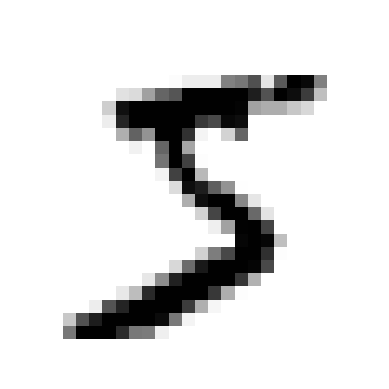

In [53]:
plt.imshow(x_train[0], cmap='binary') # Выведем на экран хранящееся в X_train[0] изображение
plt.axis('off')

# Шаг 2. Создание нейросети
## 2.1. Импортируйте библиотеки TensorFlow и Keras.

## 2.2. Создайте простую нейросеть с несколькими слоями. Например, это может быть сеть с одним входным слоем, одним скрытым слоем и выходным слоем.

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [55]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255 # Нормализация данных
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
#Нужно преобразовать матрицы изображений (X_train, X_test) и целевые значения(y_train, y_test) так,
#чтобы числа менялись от 0 до 1 (сейчас  от 0 до 255).

In [56]:
y_train = to_categorical(y_train) # Преобразование меток в категориальный формат
y_test = to_categorical(y_test)
#А целевые значения будем преобразовывать методом «one-hot encoding».
#целевое значение y_train[0] = 5 будет преобразовано в вектор y_train[0] = [0 0 0 0 0 1 0 0 0 0], y_train[1] = 0 преобразуется в y_train[1] = [1 0 0 0 0 0 0 0 0 0]...
#То есть каждое целевое значение будет преобразовано в вектор, состоящий из нулей и одной единицы.

In [57]:
from keras.models import Sequential
from keras.layers import Dense

In [58]:
model = models.Sequential() # Создание модели

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Для построения модели используем обычные полносвязанные слои с разным количеством узлов. В качестве функции активации- функция relu.

In [59]:
model.summary() #Выведем полученную модель на экран

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

# Шаг 3. Обучение нейросети

## 3.1. Настройте параметры обучения, такие как оптимизатор, функция потерь и метрики.

## 3.2. Обучите нейросеть на тренировочных данных с использованием метода fit().

In [60]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#метрика ‘binary_accuracy’ и функция потерь ‘binary_crossentropy’. В качестве оптимайзера можно выбрать Adam:

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs= 5, validation_split = 0.2)# Обучаем можель, с помощью обучающих данных

Epoch 1/5
750/750 [==============================] - 41s 53ms/step - loss: 0.2079 - accuracy: 0.9351 - val_loss: 0.0865 - val_accuracy: 0.9735
Epoch 2/5
750/750 [==============================] - 39s 51ms/step - loss: 0.0594 - accuracy: 0.9814 - val_loss: 0.0559 - val_accuracy: 0.9834
Epoch 3/5
559/750 [=====================>........] - ETA: 8s - loss: 0.0415 - accuracy: 0.9862

# Шаг 4. Оценка производительности модели

## 4.1. Оцените производительность обученной модели на тестовых данных, используя метод evaluate().

## 4.2. Опубликуйте ссылку на Github в LMS Odin.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0277 - accuracy: 0.9907


In [ ]:
print("Точность на тестовых данных:", test_acc)

Точность на тестовых данных: 0.9907000064849854
